In [12]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

In [14]:
print(y_train_raw[0])
print(x_train_raw.shape)
print(x_test_raw.shape)

5
(60000, 28, 28)
(10000, 28, 28)


In [15]:
num_classes = 15
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


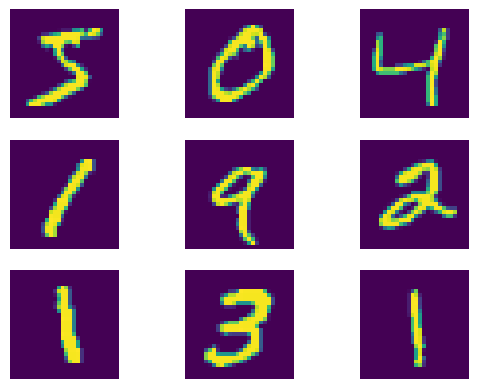

In [16]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [17]:
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [18]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_dim=784),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(124, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 124)               31868     
                                                                 
 dense_8 (Dense)             (None, 64)                8000      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 573,766
Trainable params: 573,766
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 15) and (32, 10) are incompatible


In [24]:
model.evaluate(x_test, y_test)

ValueError: in user code:

    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 15) and (None, 10) are incompatible
